In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis): # normal pdf
        def n_pdf(x, mu=0., sigma=1.):
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob] # each row is one x value
        return np.array(pdf)
    return ksd


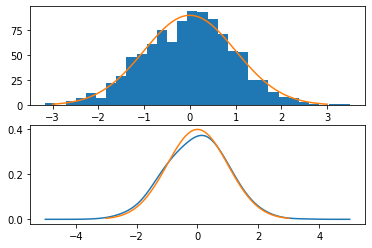

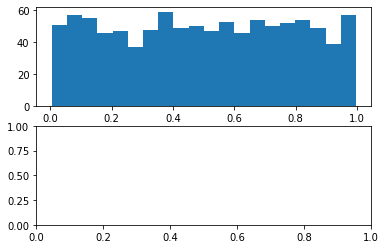

In [2]:
# Plot normal distribution
fig, ax = plt.subplots(2)
x = np.random.randn(1000)
sigma =  1
x_values = np.linspace(-5., 5., 100)
ks_density = ksdensity(x, width=0.4)
x1=np.linspace(-3*sigma, 3*sigma, 100)
ax[0].hist(x, bins=30) # number of bins
ax[1].plot(x_values, ks_density(x_values))
ax[0].plot(x1, 225*stats.norm.pdf(x1, 0, sigma))
ax[1].plot(x1, stats.norm.pdf(x1, 0, sigma))



# np.linspace(start, stop, number of steps)



# Plot uniform distribution
fig2, ax2 = plt.subplots(2)
x = np.random.rand(1000)
ax2[0].hist(x, bins=20)
ks_density = ksdensity(x, width=0.2)
x_values = np.linspace(-1., 2., 100)
plt.show()
ax2[1].plot(x_values, ks_density(x_values))
plt.show()

There is a clear advantage to using the kernel density function as it is smoothed into a continuous function that can better be intepreted when comparing to a continuous normal disribution. 

In [3]:
#Finding the theoretical mean and standard deviation from uniform distribution histogram data
samples =1000
bin_number = 30
n = np.random.rand(samples)
def get_data(samples,bin_number,n):
    
    bins = []
    for i in range(bin_number):
        interval = 1/bin_number
        temp=0
        for nj in n:
            if (interval*(i)) < nj < (interval*(i+1)):
                temp+=1
        bins.append(temp)

    #probabilities
    def get_probs(bins):
        bin_probs=[]
        for x in range(len(bins)):
            bin_probs.append(bins[x]/samples)
        return(bin_probs)
    

    #means
    def bin_mean(bins,j):
        return samples*get_probs(bins)[j]

    def mean_bin_mean(bins):
        tot=0
        for i in range(len(bins)):
            tot += bin_mean(bins,i)
        return tot/len(bins)

    #standard deviations
    def bin_sd(bins,j):
        return np.sqrt(samples*get_probs(bins)[j]*(1-get_probs(bins)[j]))
    t_mean=samples*(1/bin_number)
    t_sd=np.sqrt(samples*(1/bin_number)*(1-1/bin_number))
    c_mean =bin_mean(bins,2)
    c_sd =bin_sd(bins,2)
    bin_prob=get_probs(bins)
    
    return t_mean,t_sd,c_mean,c_sd,bin_prob,bins
data = get_data(samples,bin_number,n)
print("Bin probabilities: " + str(data[5]))
print("For N=" +str(samples))
print('theoretical mean is ' + str(data[1]) + ". Calulated mean is " +str(data[3]) + " for N =" + str(samples))
print('theoretical sd is ' + str(data[2]) + ". Calulated sd is " +str(data[4]) + " for N =" + str(samples))


Bin probabilities: [45, 46, 27, 33, 29, 39, 37, 26, 25, 23, 34, 23, 30, 25, 31, 34, 28, 44, 32, 39, 41, 29, 38, 41, 31, 32, 30, 38, 42, 28]
For N=1000
theoretical mean is 5.676462121975467. Calulated mean is 5.12552436341883 for N =1000
theoretical sd is 27.0. Calulated sd is [0.045, 0.046, 0.027, 0.033, 0.029, 0.039, 0.037, 0.026, 0.025, 0.023, 0.034, 0.023, 0.03, 0.025, 0.031, 0.034, 0.028, 0.044, 0.032, 0.039, 0.041, 0.029, 0.038, 0.041, 0.031, 0.032, 0.03, 0.038, 0.042, 0.028] for N =1000


As N increases we see the probabilities, mean and sd start tending towards the true uniform distribution.
Therefore the histogram results are consistent with the multinomial distribution theory.

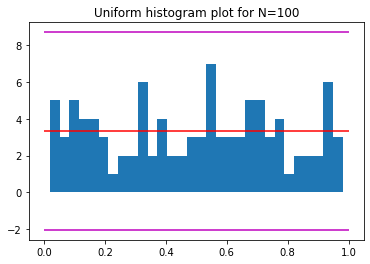

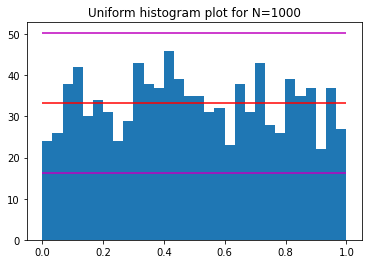

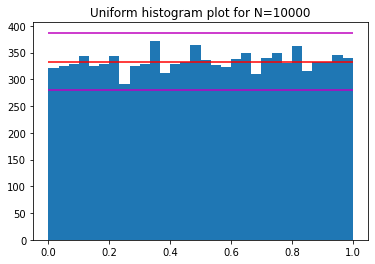

In [9]:
#plotting with mean and sd
#fig, ax = plt.subplots(2)
bin_number=30
samples = 100
n = np.random.rand(samples)
x_lin = np.linspace(0,1,100)
data=get_data(samples,bin_number,n)
mean=data[0]
sd=data[1]
plt.title("Uniform histogram plot for N=" + str(samples))
plt.hist(n,bin_number)
plt.hlines(y=mean,xmin=0,xmax=1,color='r', linestyle='-')
plt.hlines(y=mean-3*sd,xmin=0,xmax=1,color='m', linestyle='-')
plt.hlines(y=mean+3*sd,xmin=0,xmax=1,color='m', linestyle='-')
plt.show()
samples = 1000
n = np.random.rand(samples)
data=get_data(samples,bin_number,n)
mean=data[0]
sd=data[1]
plt.title("Uniform histogram plot for N=" + str(samples))
plt.hist(n,bin_number)
plt.hlines(y=mean,xmin=0,xmax=1,color='r', linestyle='-')
plt.hlines(y=mean-3*sd,xmin=0,xmax=1,color='m', linestyle='-')
plt.hlines(y=mean+3*sd,xmin=0,xmax=1,color='m', linestyle='-')
plt.show()
plt.show()
samples = 10000
n = np.random.rand(samples)
data=get_data(samples,bin_number,n)
mean=data[0]
sd=data[1]
plt.title("Uniform histogram plot for N=" + str(samples))
plt.hist(n,bin_number)
plt.hlines(y=mean,xmin=0,xmax=1,color='r', linestyle='-')
plt.hlines(y=mean-3*sd,xmin=0,xmax=1,color='m', linestyle='-')
plt.hlines(y=mean+3*sd,xmin=0,xmax=1,color='m', linestyle='-')
plt.show()
plt.show()

These plots show that our results are in line with the multinomial theory since as N gets larger, the standard deviations converge and the mean becomes more accurate to the theoretical mean.

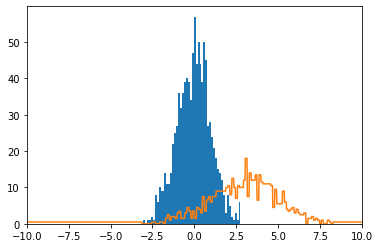

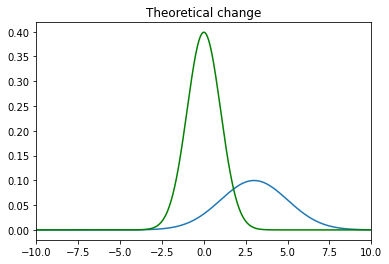

In [5]:
#Functions of random variables

#y=ax+b
a=2
b=3
samples = 1000
bin_number=100
n = np.random.randn(samples)
np.sort(n)
bin_centers=[]
range_n = n.max()-n.min()
for i in range(bin_number):
    bin_centers.append(n.min()+i*(range_n/bin_number))

bins = []
for i in range(bin_number-1):
    temp=0
    for nj in n:
        if ((bin_centers[i]-(bin_centers[i]-bin_centers[i-1])/2) < nj < (bin_centers[i]+(bin_centers[i+1]-bin_centers[i])/2)):
            temp+=1
    bins.append(temp)

bin_probs=[]
for x in range(len(bins)):
    bin_probs.append(bins[x]/samples)

def get_interval(y):
    track = 0
    low = bin_centers[0]
    up = bin_centers[1]
    while not (low < y < up):
        if track > len(bin_centers)-3:
            break
        else:
            track+=1
            low = bin_centers[track]
            up = bin_centers[track+1]
    return track
        
y = np.linspace(-10,10,1000)
p_y = []
hist_y=[]
for i in y:
    p_y.append((1/a)*bin_probs[get_interval((i-b)/a)])
    hist_y.append((1/a)*bin_probs[get_interval((i-b)/a)]*samples)

plt.hist(n, bins=50)
plt.xlim(-10,10)

plt.plot(y,hist_y)
plt.xlim(-10,10)
plt.show()
plt.title("Theoretical change")
plt.plot(y,(1/a)*stats.norm.pdf(y, b, a))
plt.plot(y,stats.norm.pdf(y, 0, 1),'g' )
plt.xlim(-10,10)
plt.show()



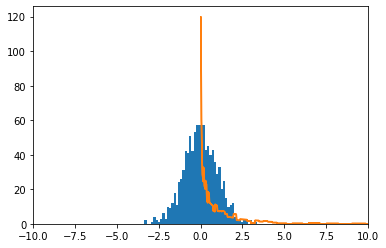

C:\Users\lukem\AppData\Local\Temp/ipykernel_13564/127600409.py:50: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(y,(1/(2*np.sqrt(y)))*stats.norm.pdf(np.sqrt(y), 0, 1))


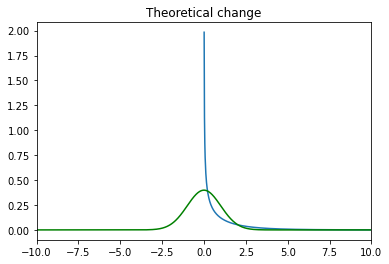

In [6]:
#y=x^2
samples = 1000
bin_number=100
n = np.random.randn(samples)
np.sort(n)
bin_centers=[]
range_n = n.max()-n.min()
for i in range(bin_number):
    bin_centers.append(n.min()+i*(range_n/bin_number))

bins = []
for i in range(bin_number-1):
    temp=0
    for nj in n:
        if ((bin_centers[i]-(bin_centers[i]-bin_centers[i-1])/2) < nj < (bin_centers[i]+(bin_centers[i+1]-bin_centers[i])/2)):
            temp+=1
    bins.append(temp)

bin_probs=[]
for x in range(len(bins)):
    bin_probs.append(bins[x]/samples)

def get_interval(y):
    track = 0
    low = bin_centers[0]
    up = bin_centers[1]
    while not (low < y < up):
        if track > len(bin_centers)-3:
            break
        else:
            track+=1
            low = bin_centers[track]
            up = bin_centers[track+1]
    return track
        
y = np.linspace(-10,10,1000)
p_y = []
hist_y=[]
for i in y:
    p_y.append((1/(2*np.sqrt(abs(i))))*bin_probs[get_interval(np.sqrt(abs(i)))])
    hist_y.append((1/(2*np.sqrt(abs(i))))*bin_probs[get_interval(np.sqrt(abs(i)))]*samples)

plt.hist(n, bins=50)
plt.xlim(-10,10)

plt.plot(abs(y),hist_y)
plt.xlim(-10,10)
plt.show()
plt.title("Theoretical change")
plt.plot(y,(1/(2*np.sqrt(y)))*stats.norm.pdf(np.sqrt(y), 0, 1))
plt.plot(y,stats.norm.pdf(y, 0, 1),'g' )
plt.xlim(-10,10)
plt.show()



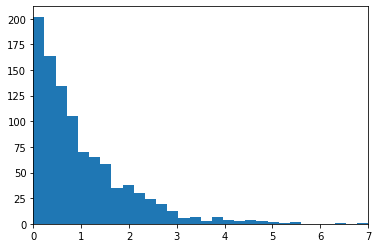

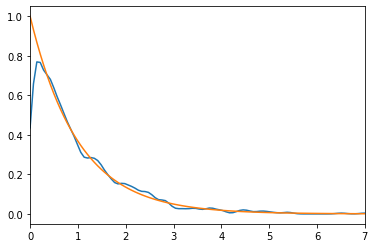

In [7]:
#Inverse CDF method
samples=1000
x = np.random.rand(samples)
y=[]
for i in x:
    y.append(-np.log(1-i))
plt.hist(y,bins=30)
plt.xlim(0,7)
plt.show()
ks_density = ksdensity(y, width=0.1)
x_values = np.linspace(0,7,100)
plt.plot(x_values,ks_density(x_values))
plt.xlim(0,7)
plt.plot(x_values, stats.expon.pdf(x_values))
plt.show()

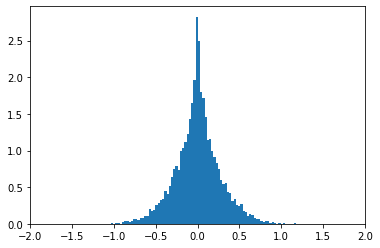

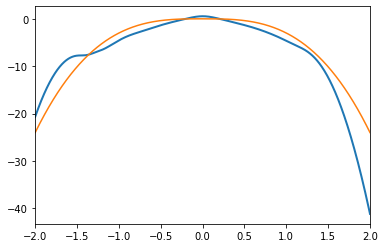

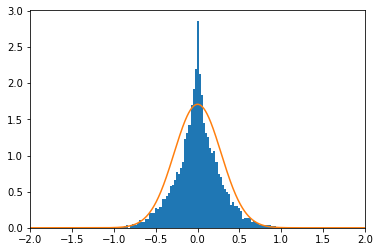

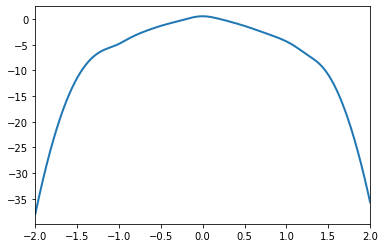

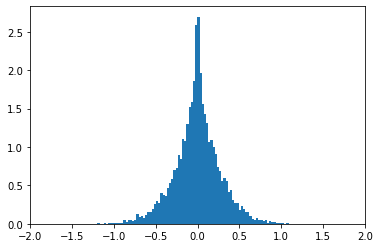

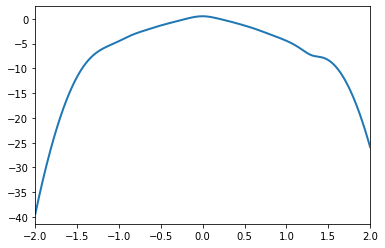

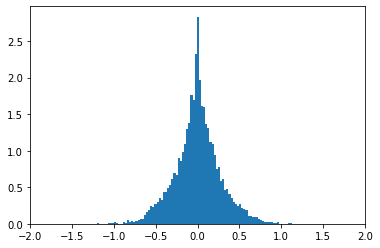

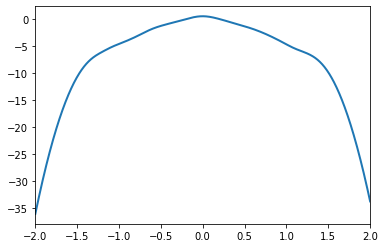

In [10]:
#Simulation from non-standard densities

alpha=0.1
samples=10000
n = np.random.rand(samples)
p_x_u_ = []
p_x = []
for i in n:
    u = (-(2/alpha**2)*np.log(1-(i)))
    p_x_u = np.random.normal(0,u)
    p_x_u_.append(p_x_u)
    p_x.append(p_x_u*(((alpha**2)/2)*np.exp(-((alpha**2)*u)/2)))
#print(x)
#print(p_x_u)
plt.hist(p_x,bins=100,density=True)
ks_density = ksdensity(p_x, width=0.1)
x_values = np.linspace(-2,2,1000)
plt.xlim(-2,2)
plt.show()
plt.plot(x_values,np.log(ks_density(x_values)),linewidth=2.0)
plt.plot(x_values,-3*abs(x_values**3))
plt.xlim(-2,2)
plt.show()




alpha=1
samples=10000
n = np.random.rand(samples)
p_x_u_ = []
p_x = []
for i in n:
    u = (-(2/alpha**2)*np.log(1-(i)))
    p_x_u = np.random.normal(0,u)
    p_x_u_.append(p_x_u)
    p_x.append(p_x_u*(((alpha**2)/2)*np.exp(-((alpha**2)*u)/2)))
    



#print(x)
#print(p_x_u)
plt.hist(p_x,bins=100,density=True)
ks_density = ksdensity(p_x, width=0.1)
x_values = np.linspace(-2,2,1000)
plt.plot(x_values,1.2*stats.norm.pdf(x_values,0,0.28))
plt.xlim(-2,2)
plt.show()
plt.plot(x_values,np.log(ks_density(x_values)),linewidth=2.0)

plt.xlim(-2,2)
plt.show()

alpha=100
samples=10000
n = np.random.rand(samples)
p_x_u_ = []
p_x = []
for i in n:
    u = (-(2/alpha**2)*np.log(1-(i)))
    p_x_u = np.random.normal(0,u)
    p_x_u_.append(p_x_u)
    p_x.append(p_x_u*(((alpha**2)/2)*np.exp(-((alpha**2)*u)/2)))
#print(x)
#print(p_x_u)
plt.hist(p_x,bins=100,density=True)
ks_density = ksdensity(p_x, width=0.1)
x_values = np.linspace(-2,2,1000)
plt.xlim(-2,2)
plt.show()
plt.plot(x_values,np.log(ks_density(x_values)),linewidth=2.0)
plt.xlim(-2,2)
plt.show()
alpha=1000
samples=10000
n = np.random.rand(samples)
p_x_u_ = []
p_x = []
for i in n:
    u = (-(2/alpha**2)*np.log(1-(i)))
    p_x_u = np.random.normal(0,u)
    p_x_u_.append(p_x_u)
    p_x.append(p_x_u*(((alpha**2)/2)*np.exp(-((alpha**2)*u)/2)))
#print(x)
#print(p_x_u)
plt.hist(p_x,bins=100,density=True)
ks_density = ksdensity(p_x, width=0.1)
x_values = np.linspace(-2,2,1000)
plt.xlim(-2,2)
plt.show()
plt.plot(x_values,np.log(ks_density(x_values)),linewidth=2.0)
plt.xlim(-2,2)
plt.show()



Plotting the log of the kernel density, we see that it approx looks like a graph of -3*abs(x^3)
Therefore the original pdf could have been exp(-3abs(x^3))
However, by inspection of the original histograms, the pdf appears to just be an exponential distrubition mirrored around the y axis.